In [12]:
import torch
from torchvision import datasets, transforms
from torchvision.io import decode_image
from torch.utils.data import DataLoader, Dataset

import numpy as np

import matplotlib.pyplot as plt

from PIL import Image
from pathlib import Path

import os

from model import MLP
from data import GenerativeImageDataset

In [2]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

In [3]:
# extract zeros + Resize + Store
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Resize(14))

save_dir = Path("./mnist_zeros")
save_dir.mkdir(parents=True, exist_ok=True)

count = 0
for idx, (img, label) in enumerate(mnist):
    if label == 0:
        img.save(save_dir / f"zero_{count}.png")
        count += 1



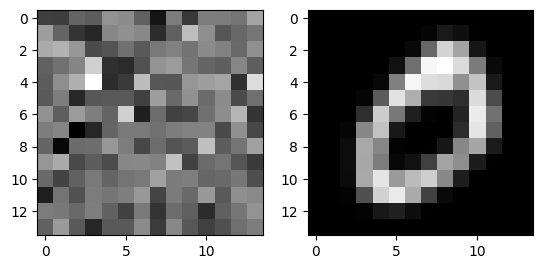

In [4]:
dataset = GenerativeImageDataset('mnist_zeros')
img = dataset[0][0]
noise = dataset[0][1]

noise_norm = (noise + torch.min(noise))/(torch.max(noise) - torch.min(noise))

fig, ax = plt.subplots(1,2)
ax[0].imshow(noise_norm[0], cmap='grey')
ax[1].imshow(img[0], cmap='grey')

In [19]:
dataloader = DataLoader(dataset, 16)

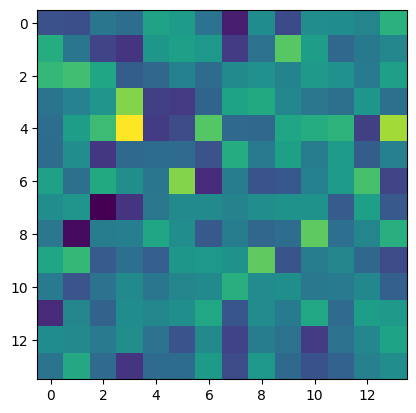

In [20]:
for images, noises in dataloader:
    plt.imshow(images[0][0])
    plt.imshow(noises[0][0])
    break

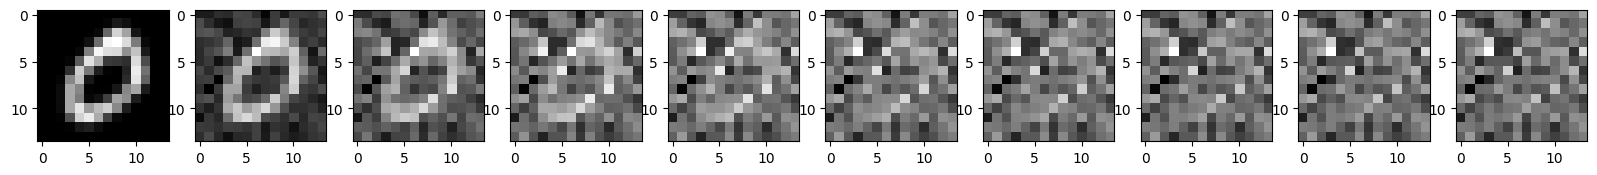

In [18]:
timeline = np.linspace(0, 1, 10)
img, noise = dataset[0]


images = []
fig, ax = plt.subplots(1,10, figsize=(20,40))

for i, t in enumerate(timeline):

    im = t*noise + (1-t)*img
    im = (im - torch.min(im))/(torch.max(im) - torch.min(im))
    images.append(images)

    ax[i].imshow(im[0], cmap='grey')




In [ ]:
model = MLP(14*14+1,512,1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
epochs = 1
timeline = np.linspace(0, 1, 10)

for epoch in range(epochs):
    for img_batch, noise_batch in dataloader: 

        

        


